En este notebook se da una implementación de un autoencoder en un perceptrón multicapa con activaciones sigmoide.

In [ ]:
# importamos librerías
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
# cargamos datos de mnist
mnist = fetch_openml("mnist_784")
X, y = mnist.data, mnist.target.astype(int)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
# normalizamos los datos y dividimos en conjuntos de entrenamiento y prueba
X = X / 255.0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = X_train.to_numpy(), X_test.to_numpy(), y_train.to_numpy(), y_test.to_numpy()

In [ ]:
# definimos dimensiones
input_size = X_train.shape[1]
hidden_size_1 = 128 
hidden_size_2 = 16
output_size = input_size

In [ ]:
# inicializamos parametros

np.random.seed(0)


# usando la inicialización de Xavi
W_1 = np.random.randn(input_size, hidden_size_1)*np.sqrt(2./(input_size+hidden_size_1))
b_1 = np.zeros((1, hidden_size_1))
W_2 = np.random.randn(hidden_size_1, hidden_size_2)*np.sqrt(2./(hidden_size_1+hidden_size_2))
b_2 = np.zeros((1, hidden_size_2))
W_3 = np.random.randn(hidden_size_2, output_size)*np.sqrt(2./(hidden_size_2+output_size))
b_3 = np.zeros((1, output_size))

# hiperparámetros
learning_rate = 1e-4
epochs = 150
batch_size = 128

In [ ]:
# funcion de costo
# como el error cuadrático
def compute_loss(y, y_pred):
    return ((y - y_pred)**2).sum()/2

In [ ]:
# funciones de activación y sus derivadas
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

In [ ]:
# entrenamiento
for epoch in range(epochs):
    # hacemos un shuffle a los datos de entrenamiento
    np.random.shuffle(X_train)
    total_loss = 0
    for i in range(batch_size, X_train.shape[0]+1, batch_size):
        # lote de datos
        batch_X = X_train[i-batch_size:i]

        # propagación hacia adelante
        z_1 = batch_X @ W_1 + b_1
        y_1 = sigmoid(z_1)  # sigmoide entrada por entrada
        z_2 = y_1 @ W_2 + b_2
        y_2 = sigmoid(z_2)  # sigmoide entrada por entrada
        y_pred = y_2 @ W_3 + b_3

        # calcular pérdida
        loss = compute_loss(batch_X, y_pred)
        total_loss += loss

        # BACKPROPAGATION
        # Derivada de la pérdida respecto al output 
        grad_loss_y_pred = y_pred - batch_X

        # Gradientes para W3 y b3
        grad_W3 = np.dot(grad_loss_y_pred.T, y_2).T
        grad_b3 = np.sum(grad_loss_y_pred, axis=0)

        # Gradientes para W2 y b2
        aux2 = grad_loss_y_pred@W_3.T
        delta_2 = aux2*sigmoid_derivative(z_2)

        grad_b2 = np.sum(delta_2, axis=0)
        grad_W2 = np.dot(delta_2.T, y_1).T

        # Gradientes para W1 y b1
        aux1 = delta_2@W_2.T
        delta_1 = aux1*sigmoid_derivative(z_1)

        grad_b1 = np.sum(delta_1, axis=0)
        grad_W1 = np.dot(delta_1.T, batch_X).T

        # actualización de parámetros con descenso de gradiente
        W_3 -= learning_rate * grad_W3
        b_3 -= learning_rate * grad_b3
        W_2 -= learning_rate * grad_W2
        b_2 -= learning_rate * grad_b2
        W_1 -= learning_rate * grad_W1
        b_1 -= learning_rate * grad_b1

    # calcular la pérdida promedio por época
    avg_loss = total_loss / (X_train.shape[0] // batch_size)

    # avance
    print(f"Epoch {epoch + 1}, Loss: {avg_loss}")

Epoch 1, Loss: 3335.887007803781
Epoch 2, Loss: 2986.1024155355794
Epoch 3, Loss: 2627.594007689103
Epoch 4, Loss: 2312.6774653737752
Epoch 5, Loss: 2118.8531837389164
Epoch 6, Loss: 2014.3779200760514
Epoch 7, Loss: 1929.634225814003
Epoch 8, Loss: 1864.5038553109584
Epoch 9, Loss: 1808.2522007928546
Epoch 10, Loss: 1756.0131893066048
Epoch 11, Loss: 1705.6271522291631
Epoch 12, Loss: 1658.0857217835405
Epoch 13, Loss: 1615.2402981350745
Epoch 14, Loss: 1580.882640894229
Epoch 15, Loss: 1554.7226041479594
Epoch 16, Loss: 1535.5283604345827
Epoch 17, Loss: 1520.4888278379406
Epoch 18, Loss: 1505.4621963583445
Epoch 19, Loss: 1489.4500373642024
Epoch 20, Loss: 1474.0070995870926
Epoch 21, Loss: 1460.2585788947167
Epoch 22, Loss: 1448.7532221684382
Epoch 23, Loss: 1440.435149084086
Epoch 24, Loss: 1434.6542939296012
Epoch 25, Loss: 1430.0436615652327
Epoch 26, Loss: 1426.236155918351
Epoch 27, Loss: 1422.6834901011732
Epoch 28, Loss: 1419.7179496018464
Epoch 29, Loss: 1416.9019304998299


Resultados del autocodificador con los datos de prueba para ver la calidad de la reconstruccción de la imagen de cada dígito.

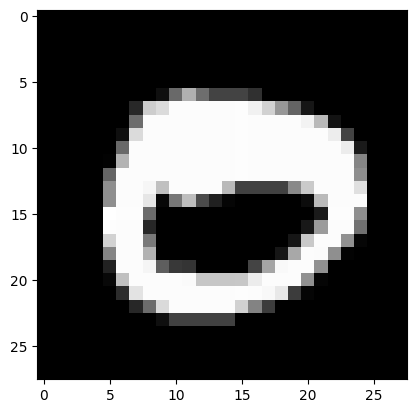

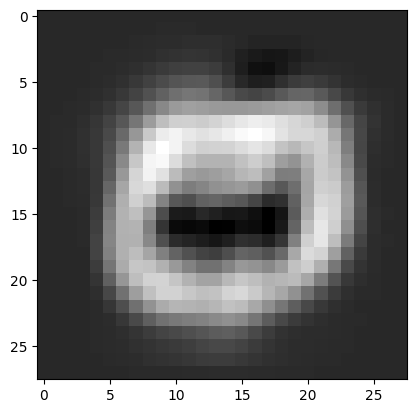

In [ ]:
idx = 380
img_reshaped = X_test[idx].reshape(28, 28)


# Mostrar la imagen
plt.imshow(img_reshaped, cmap='gray')  
plt.show()

z_1 = X_test[idx] @ W_1 + b_1
y_1 = sigmoid(z_1)  # sigmoide
z_2 = y_1 @ W_2 + b_2
y_2 = sigmoid(z_2)  # sigmoide
y_pred = y_2 @ W_3 + b_3

img_reshaped = y_pred.reshape(28, 28)

# Mostrar la imagen
plt.imshow(img_reshaped, cmap='gray')  
plt.show()

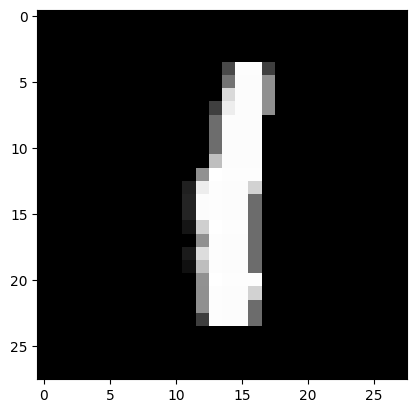

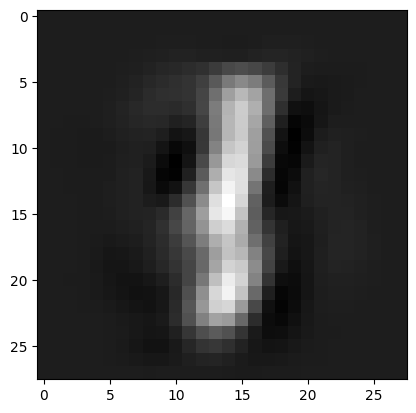

In [ ]:
idx = 38
img_reshaped = X_test[idx].reshape(28, 28)


# Mostrar la imagen
plt.imshow(img_reshaped, cmap='gray')  
plt.show()

z_1 = X_test[idx] @ W_1 + b_1
y_1 = sigmoid(z_1)  # sigmoide
z_2 = y_1 @ W_2 + b_2
y_2 = sigmoid(z_2)  # sigmoide
y_pred = y_2 @ W_3 + b_3

img_reshaped = y_pred.reshape(28, 28)

# Mostrar la imagen
plt.imshow(img_reshaped, cmap='gray')  
plt.show()

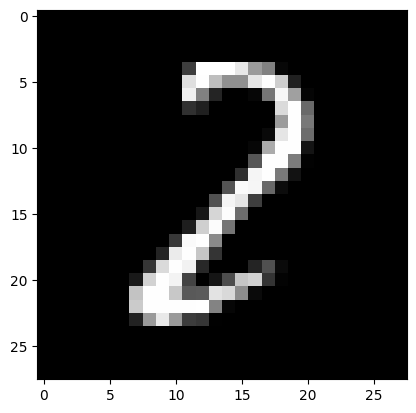

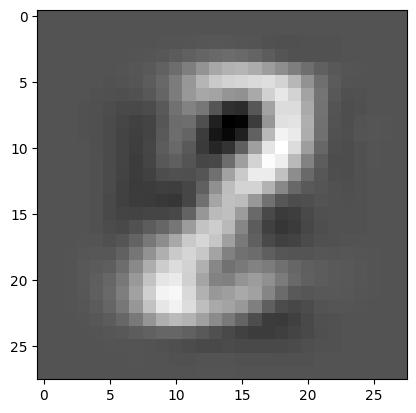

In [ ]:
idx = 480
img_reshaped = X_test[idx].reshape(28, 28)


# Mostrar la imagen
plt.imshow(img_reshaped, cmap='gray')  
plt.show()

z_1 = X_test[idx] @ W_1 + b_1
y_1 = sigmoid(z_1)  # sigmoide
z_2 = y_1 @ W_2 + b_2
y_2 = sigmoid(z_2)  # sigmoide
y_pred = y_2 @ W_3 + b_3

img_reshaped = y_pred.reshape(28, 28)

# Mostrar la imagen
plt.imshow(img_reshaped, cmap='gray')  
plt.show()

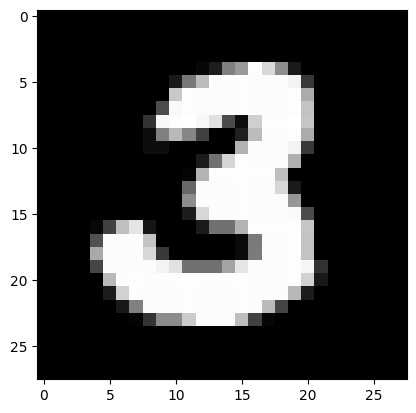

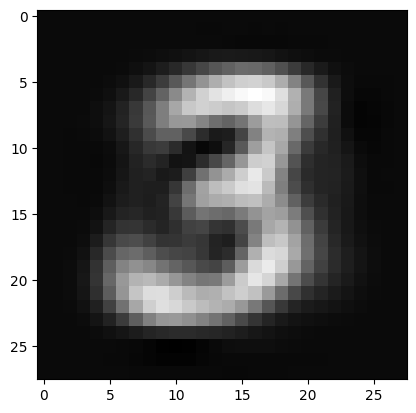

In [ ]:
idx = 5198
img_reshaped = X_test[idx].reshape(28, 28)


# Mostrar la imagen
plt.imshow(img_reshaped, cmap='gray')  
plt.show()

z_1 = X_test[idx] @ W_1 + b_1
y_1 = sigmoid(z_1)  # sigmoide
z_2 = y_1 @ W_2 + b_2
y_2 = sigmoid(z_2)  # sigmoide
y_pred = y_2 @ W_3 + b_3

img_reshaped = y_pred.reshape(28, 28)

# Mostrar la imagen
plt.imshow(img_reshaped, cmap='gray')  
plt.show()

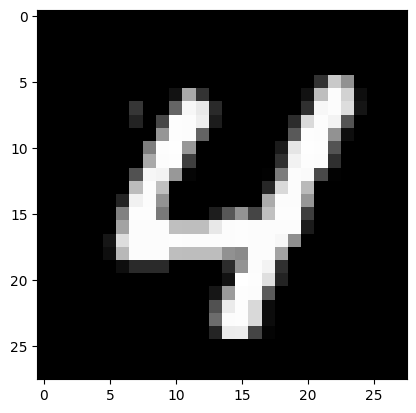

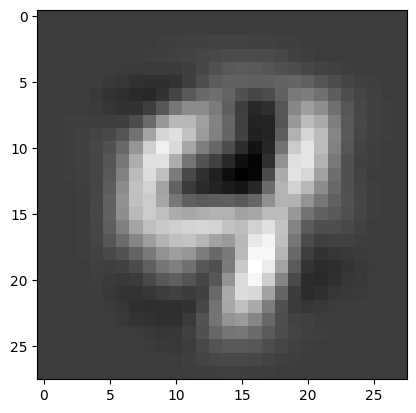

In [ ]:
idx = 389
img_reshaped = X_test[idx].reshape(28, 28)


# Mostrar la imagen
plt.imshow(img_reshaped, cmap='gray')  
plt.show()

z_1 = X_test[idx] @ W_1 + b_1
y_1 = sigmoid(z_1)  # sigmoide
z_2 = y_1 @ W_2 + b_2
y_2 = sigmoid(z_2)  # sigmoide
y_pred = y_2 @ W_3 + b_3

img_reshaped = y_pred.reshape(28, 28)

# Mostrar la imagen
plt.imshow(img_reshaped, cmap='gray')  
plt.show()

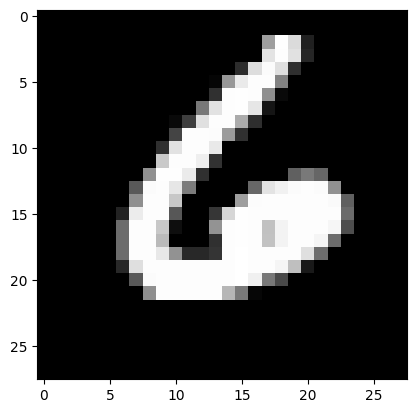

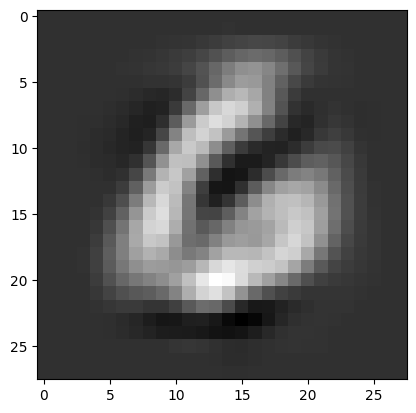

In [ ]:
idx = 321
img_reshaped = X_test[idx].reshape(28, 28)


# Mostrar la imagen
plt.imshow(img_reshaped, cmap='gray')  
plt.show()

z_1 = X_test[idx] @ W_1 + b_1
y_1 = sigmoid(z_1)  # sigmoide
z_2 = y_1 @ W_2 + b_2
y_2 = sigmoid(z_2)  # sigmoide
y_pred = y_2 @ W_3 + b_3

img_reshaped = y_pred.reshape(28, 28)

# Mostrar la imagen
plt.imshow(img_reshaped, cmap='gray')  
plt.show()

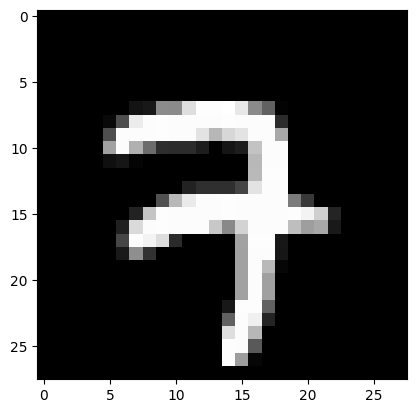

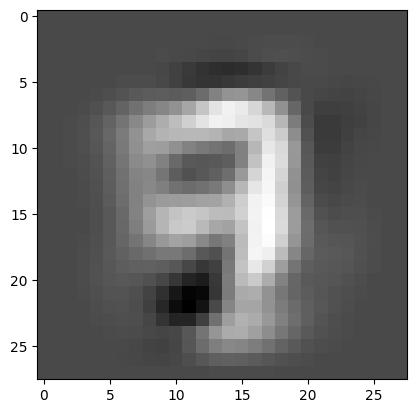

In [ ]:
idx = 330
img_reshaped = X_test[idx].reshape(28, 28)


# Mostrar la imagen
plt.imshow(img_reshaped, cmap='gray') 
plt.show()

z_1 = X_test[idx] @ W_1 + b_1
y_1 = sigmoid(z_1)  # sigmoide
z_2 = y_1 @ W_2 + b_2
y_2 = sigmoid(z_2)  # sigmoide
y_pred = y_2 @ W_3 + b_3

img_reshaped = y_pred.reshape(28, 28)

# Mostrar la imagen
plt.imshow(img_reshaped, cmap='gray')  
plt.show()

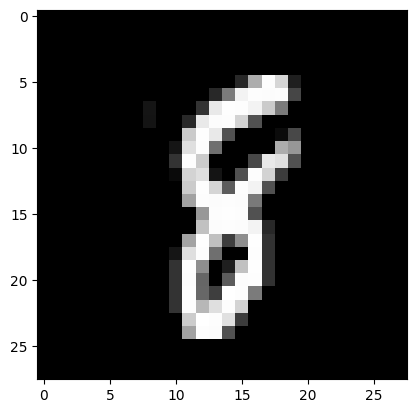

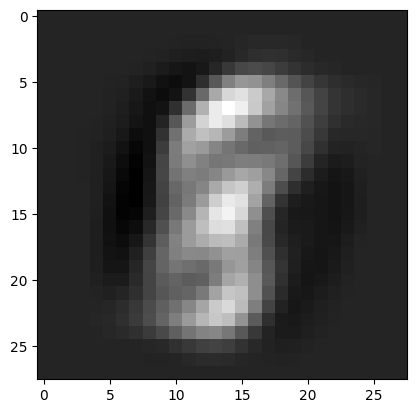

In [ ]:
idx = 335
img_reshaped = X_test[idx].reshape(28, 28)


# Mostrar la imagen
plt.imshow(img_reshaped, cmap='gray')  
plt.show()

z_1 = X_test[idx] @ W_1 + b_1
y_1 = sigmoid(z_1)  # sigmoide
z_2 = y_1 @ W_2 + b_2
y_2 = sigmoid(z_2)  # sigmoide
y_pred = y_2 @ W_3 + b_3

img_reshaped = y_pred.reshape(28, 28)

# Mostrar la imagen
plt.imshow(img_reshaped, cmap='gray')  
plt.show()

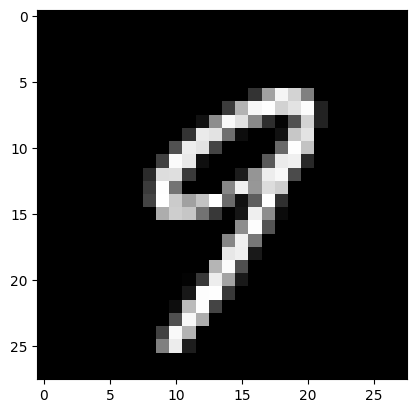

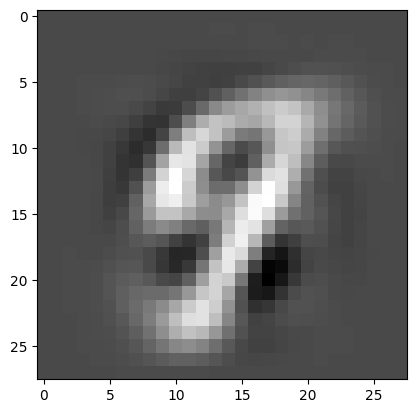

In [ ]:
idx = 9000
img_reshaped = X_test[idx].reshape(28, 28)


# Mostrar la imagen
plt.imshow(img_reshaped, cmap='gray')  
plt.show()

z_1 = X_test[idx] @ W_1 + b_1
y_1 = sigmoid(z_1)  # sigmoide
z_2 = y_1 @ W_2 + b_2
y_2 = sigmoid(z_2)  # sigmoide
y_pred = y_2 @ W_3 + b_3

img_reshaped = y_pred.reshape(28, 28)

# Mostrar la imagen
plt.imshow(img_reshaped, cmap='gray')  
plt.show()

In [ ]:
# evaluar en conjunto de prueba
z_1 = X_test @ W_1 + b_1
y_1 = sigmoid(z_1)  # sigmoide
z_2 = y_1 @ W_2 + b_2
y_2 = sigmoid(z_2)  # sigmoide
y_pred = y_2 @ W_3 + b_3

test_loss = compute_loss(X_test, y_pred)
print(f"Loss on test set: {test_loss}")

Loss on test set: 150372.58227432397
